<a href="https://colab.research.google.com/github/abinavharsath41-ctrl/FOML-exp/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset created with shape: (500, 8)
R² Score: 0.938
Root Mean Squared Error: 21340.51


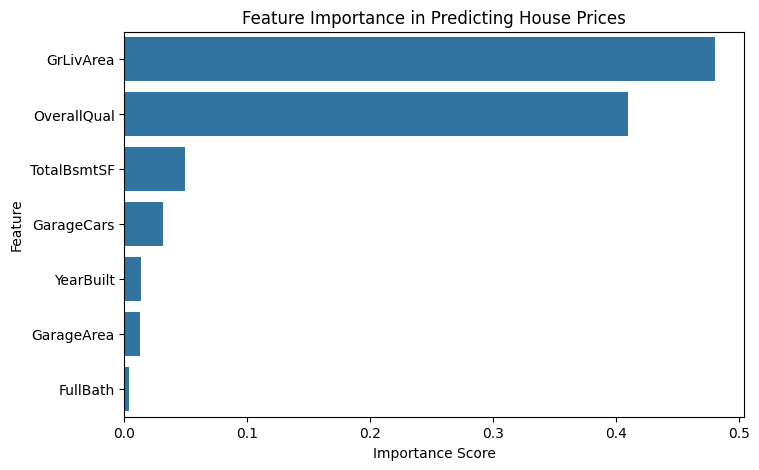

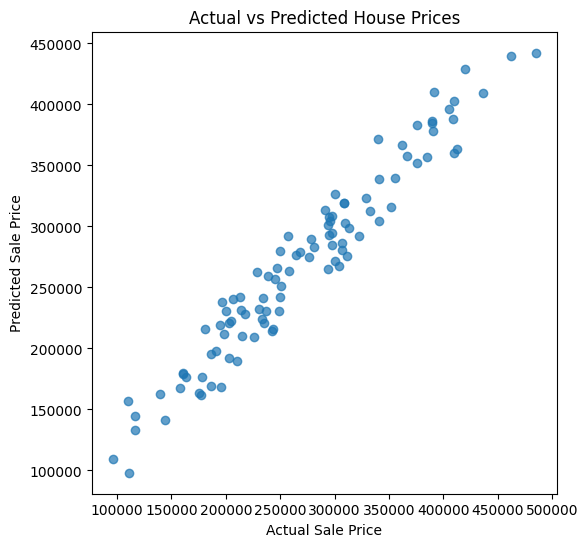

In [ ]:
# ======================================
# 🏠 HOUSE PRICE PREDICTION PROJECT
# Using Random Forest Regressor
# No file uploads or external downloads
# ======================================

# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# STEP 2: Create a Synthetic Dataset
np.random.seed(42)
n_samples = 500

df = pd.DataFrame({
    'OverallQual': np.random.randint(1, 10, n_samples),
    'GrLivArea': np.random.randint(500, 4000, n_samples),
    'GarageCars': np.random.randint(0, 4, n_samples),
    'GarageArea': np.random.randint(0, 1000, n_samples),
    'TotalBsmtSF': np.random.randint(0, 2000, n_samples),
    'FullBath': np.random.randint(1, 4, n_samples),
    'YearBuilt': np.random.randint(1950, 2022, n_samples)
})

# Create target variable (SalePrice) with some noise
df['SalePrice'] = (
    df['OverallQual'] * 20000
    + df['GrLivArea'] * 50
    + df['GarageCars'] * 15000
    + df['TotalBsmtSF'] * 30
    + np.random.randint(-20000, 20000, n_samples)
)

print("Dataset created with shape:", df.shape)
df.head()

# STEP 3: Define Features and Target
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
            'TotalBsmtSF', 'FullBath', 'YearBuilt']
target = 'SalePrice'

X = df[features]
y = df[target]

# STEP 4: Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# STEP 5: Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# STEP 6: Predictions
y_pred = model.predict(X_test)

# STEP 7: Evaluate Model
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2:.3f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

# STEP 8: Feature Importance
importance = model.feature_importances_
feat_imp = pd.Series(importance, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Feature Importance in Predicting House Prices')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# STEP 9: Actual vs Predicted Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.show()


